In [1]:
import glob, os, h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

# Reading the file directly from here

In [2]:
fg = pd.read_csv('results-rho.csv')

In [4]:
fg.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'ranking', 'fix_lnb', 'relax_lnb',
       'stat'],
      dtype='object')

In [6]:
fg.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
fg.drop(['Unnamed: 0.1'],inplace=True,axis=1)

In [11]:
fg = fg.rename(columns={'stat': 'gwstat'})

In [13]:
fg = fg.rename(columns={'name': 'gwname'})

In [15]:
fg.drop(['ranking'],inplace=True,axis=1)

In [17]:
fg['ranking'] = fg['fix_lnb'] - fg['relax_lnb'] + fg['gwstat']

In [20]:
fg.sort_values(by='ranking',inplace=True,ascending=False)

In [21]:
fg

gwname      fix_lnb     relax_lnb    gwstat      ranking
1     190701_223118    11.301643      7.331421  4.952719     8.922941
3     190605_021909    12.771765      9.127000  3.862183     7.506948
5     190411_050213    10.246110      6.976561  3.681050     6.950599
18    190520_102326     5.990904      3.872832  4.148149     6.266221
2     190409_032650    11.120391      7.384171  2.218422     5.954642
...             ...          ...           ...       ...          ...
1045  190519_230244   604.206402    761.931638  2.434241  -155.290995
1046  190612_195828   406.788341    624.079481 -1.029691  -218.320830
1047  190519_230231   840.912410   1060.075528 -3.614769  -222.777887
1048  190518_223900   367.513293    589.391614 -2.869363  -224.747685
1049  190621_081615  8315.252956  12616.639059 -1.468428 -4302.854531

[1050 rows x 5 columns]

In [23]:
fg.to_csv('candidate.csv',index=False)

In [4]:
bg = pd.read_csv('0330-11kbackground-stat.csv')

In [5]:
bg

Unnamed: 0  Unnamed: 0.1         name       ranking       fix_lnb  \
0                0             0  chunk70_663     32.979141     78.438030   
1                1             1  chunk97_213     28.174368     84.923274   
2                2             2  chunk62_582     16.720414     92.286157   
3                3             3  chunk17_497     13.829248     92.057008   
4                4             4  chunk74_411     13.195566    248.564570   
...            ...           ...          ...           ...           ...   
111364      111364        111364  chunk31_675 -20213.689802  23985.477046   
111365      111365        111365  chunk26_163 -23366.429459  24613.027914   
111366      111366        111366   chunk3_302 -24573.001154  26786.629929   
111367      111367        111367  chunk17_288 -27773.827506  23585.803754   
111368      111368        111368  chunk16_513 -33168.175935   3424.729524   

           relax_lnb      stat            gwname  
0          45.458890 -3.983977  b'190602_060204'  
1          56.748906  2.560523  b'190417_170347'  
2          75.565742 -1.007927  b'190522_035322'  
3          78.227759 -5.621618  b'190502_133532'  
4         235.369004 -5.404331  b'190517_002250'  
...              ...       ...               ...  
111364  44199.166848  0.619979  b'190518_045028'  
111365  47979.457373 -2.059066  b'190413_120354'  
111366  51359.631083 -4.375410  b'190419_211737'  
111367  51359.631260 -4.375410  b'190419_211737'  
111368  36592.905459 -1.338106  b'190505_221849'  

[111369 rows x 8 columns]

In [24]:
back = pd.read_csv('0330-11kbackground-stat.csv')

In [29]:
back.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'ranking', 'fix_lnb', 'relax_lnb',
       'stat', 'gwname'],
      dtype='object')

In [30]:
back.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [32]:
back.rename(columns={'name': 'chunk_id'})

chunk_id       ranking       fix_lnb     relax_lnb      stat  \
0       chunk70_663     32.979141     78.438030     45.458890 -3.983977   
1       chunk97_213     28.174368     84.923274     56.748906  2.560523   
2       chunk62_582     16.720414     92.286157     75.565742 -1.007927   
3       chunk17_497     13.829248     92.057008     78.227759 -5.621618   
4       chunk74_411     13.195566    248.564570    235.369004 -5.404331   
...             ...           ...           ...           ...       ...   
111364  chunk31_675 -20213.689802  23985.477046  44199.166848  0.619979   
111365  chunk26_163 -23366.429459  24613.027914  47979.457373 -2.059066   
111366   chunk3_302 -24573.001154  26786.629929  51359.631083 -4.375410   
111367  chunk17_288 -27773.827506  23585.803754  51359.631260 -4.375410   
111368  chunk16_513 -33168.175935   3424.729524  36592.905459 -1.338106   

                  gwname  
0       b'190602_060204'  
1       b'190417_170347'  
2       b'190522_035322'  
3       b'190502_133532'  
4       b'190517_002250'  
...                  ...  
111364  b'190518_045028'  
111365  b'190413_120354'  
111366  b'190419_211737'  
111367  b'190419_211737'  
111368  b'190505_221849'  

[111369 rows x 6 columns]

In [33]:
cols = back.columns.tolist()

In [34]:
cols = cols[-1:] + cols[:-1]

In [37]:
cols

['gwname', 'name', 'ranking', 'fix_lnb', 'relax_lnb', 'stat']

In [35]:
back = back[cols]

In [39]:
back = back[['gwname','name','fix_lnb','relax_lnb','stat','ranking']]

In [40]:
back.rename(columns={'stat':'gwstat'})

gwname         name       fix_lnb     relax_lnb    gwstat  \
0       b'190602_060204'  chunk70_663     78.438030     45.458890 -3.983977   
1       b'190417_170347'  chunk97_213     84.923274     56.748906  2.560523   
2       b'190522_035322'  chunk62_582     92.286157     75.565742 -1.007927   
3       b'190502_133532'  chunk17_497     92.057008     78.227759 -5.621618   
4       b'190517_002250'  chunk74_411    248.564570    235.369004 -5.404331   
...                  ...          ...           ...           ...       ...   
111364  b'190518_045028'  chunk31_675  23985.477046  44199.166848  0.619979   
111365  b'190413_120354'  chunk26_163  24613.027914  47979.457373 -2.059066   
111366  b'190419_211737'   chunk3_302  26786.629929  51359.631083 -4.375410   
111367  b'190419_211737'  chunk17_288  23585.803754  51359.631260 -4.375410   
111368  b'190505_221849'  chunk16_513   3424.729524  36592.905459 -1.338106   

             ranking  
0          32.979141  
1          28.174368  
2          16.720414  
3          13.829248  
4          13.195566  
...              ...  
111364 -20213.689802  
111365 -23366.429459  
111366 -24573.001154  
111367 -27773.827506  
111368 -33168.175935  

[111369 rows x 6 columns]

In [42]:
back.rename(columns={'name':'chunk_id'})

gwname     chunk_id       fix_lnb     relax_lnb      stat  \
0       b'190602_060204'  chunk70_663     78.438030     45.458890 -3.983977   
1       b'190417_170347'  chunk97_213     84.923274     56.748906  2.560523   
2       b'190522_035322'  chunk62_582     92.286157     75.565742 -1.007927   
3       b'190502_133532'  chunk17_497     92.057008     78.227759 -5.621618   
4       b'190517_002250'  chunk74_411    248.564570    235.369004 -5.404331   
...                  ...          ...           ...           ...       ...   
111364  b'190518_045028'  chunk31_675  23985.477046  44199.166848  0.619979   
111365  b'190413_120354'  chunk26_163  24613.027914  47979.457373 -2.059066   
111366  b'190419_211737'   chunk3_302  26786.629929  51359.631083 -4.375410   
111367  b'190419_211737'  chunk17_288  23585.803754  51359.631260 -4.375410   
111368  b'190505_221849'  chunk16_513   3424.729524  36592.905459 -1.338106   

             ranking  
0          32.979141  
1          28.174368  
2          16.720414  
3          13.829248  
4          13.195566  
...              ...  
111364 -20213.689802  
111365 -23366.429459  
111366 -24573.001154  
111367 -27773.827506  
111368 -33168.175935  

[111369 rows x 6 columns]

In [43]:
back.to_csv('background.csv',index=False)

# Making a figure for the paper:

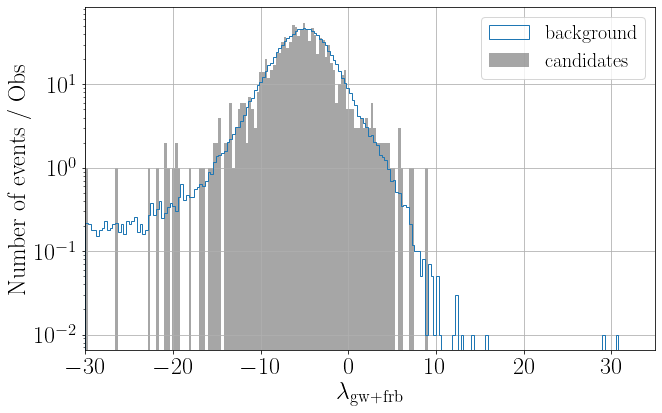

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

bgranking = bg['ranking'] + bg['stat']
fgranking = fg['ranking'] + fg['stat']

low=-30
bins = np.linspace(low,np.max(bgranking)+1,200)
counts, _ = np.histogram(bgranking,bins=bins)

ax.hist(bins[:-1], bins, weights=counts/100,histtype="step",label='background')
ax.hist(fgranking,bins=bins,alpha=0.7,color='grey',label='candidates')
#ax.annotate('$190701\_223118 $'+'\n'+'$\& FRB20190701E$',
#            xy=(8.92,1),arrowprops=dict(arrowstyle='->'),xytext=(11,2),fontsize=14)
ax.set_yscale('log')
ax.legend()
ax.set_xlim(-30,35)
ax.set_xlabel('$\lambda_\mathrm{gw+frb}$')
ax.set_ylabel('Number of events / Obs')
fig.savefig('newstat.png',bbox_inches='tight')

In [7]:
bins

array([-30.        , -29.68977442, -29.37954884, -29.06932326,
       -28.75909768, -28.44887209, -28.13864651, -27.82842093,
       -27.51819535, -27.20796977, -26.89774419, -26.58751861,
       -26.27729303, -25.96706745, -25.65684187, -25.34661628,
       -25.0363907 , -24.72616512, -24.41593954, -24.10571396,
       -23.79548838, -23.4852628 , -23.17503722, -22.86481164,
       -22.55458606, -22.24436047, -21.93413489, -21.62390931,
       -21.31368373, -21.00345815, -20.69323257, -20.38300699,
       -20.07278141, -19.76255583, -19.45233024, -19.14210466,
       -18.83187908, -18.5216535 , -18.21142792, -17.90120234,
       -17.59097676, -17.28075118, -16.9705256 , -16.66030002,
       -16.35007443, -16.03984885, -15.72962327, -15.41939769,
       -15.10917211, -14.79894653, -14.48872095, -14.17849537,
       -13.86826979, -13.55804421, -13.24781862, -12.93759304,
       -12.62736746, -12.31714188, -12.0069163 , -11.69669072,
       -11.38646514, -11.07623956, -10.76601398, -10.45

In [8]:
bins[2]-bins[1]

0.31022558102955244

# Cumulative sum

In [76]:
back_ranking = bg['ranking'] + bg['stat']
fore_ranking = fg['ranking'] + fg['stat']

bins = np.linspace(-30,np.max(back_ranking)+1,200)

In [77]:
back_counts, _ = np.histogram(back_ranking,bins=bins)
fore_counts, _ = np.histogram(fore_ranking,bins=bins)

In [78]:
back_cum = np.cumsum(back_counts[::-1])[::-1]
ifar = 100/back_cum
fore_cum = np.cumsum(fore_counts[::-1])[::-1]

/work/yifan.wang/virtualenv/sgwb/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [79]:
fore_cum

array([1036, 1035, 1035, 1035, 1035, 1035, 1035, 1035, 1035, 1035, 1035,
       1035, 1034, 1034, 1034, 1034, 1034, 1034, 1034, 1034, 1034, 1034,
       1034, 1034, 1033, 1033, 1033, 1032, 1032, 1032, 1030, 1029, 1029,
       1028, 1026, 1025, 1025, 1025, 1025, 1024, 1024, 1024, 1024, 1023,
       1022, 1022, 1021, 1020, 1018, 1016, 1012, 1012, 1010, 1008, 1002,
       1001,  998,  993,  987,  981,  979,  972,  967,  964,  956,  942,
        928,  908,  896,  881,  864,  840,  816,  784,  747,  720,  688,
        636,  587,  549,  504,  449,  404,  371,  323,  284,  261,  225,
        191,  170,  140,  122,  107,  101,   91,   78,   63,   58,   53,
         48,   45,   42,   38,   35,   31,   28,   22,   19,   17,   15,
         13,   11,    9,    8,    7,    7,    4,    3,    3,    3,    2,
          1,    1,    1,    1,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [81]:
fore_ifar = [100 if len(bgranking[bgranking>=b])==0 else 100/len(bgranking[bgranking>=b]) for b in bins[:-1]]

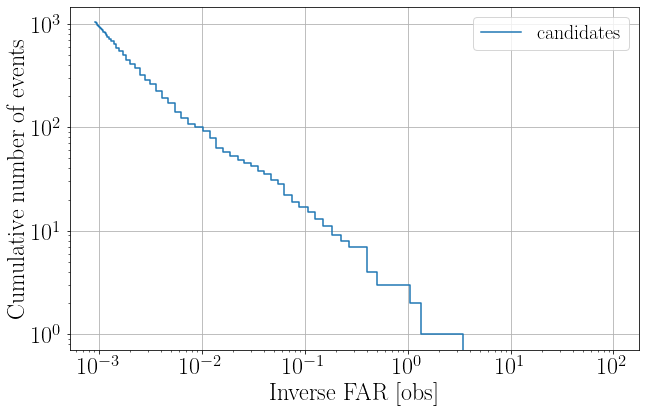

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.step(ifar,back_cum/100,label='background')
ax.step(fore_ifar,fore_cum,label='candidates')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
#ax.set_ylim(,)
ax.set_ylabel('Cumulative number of events')
ax.set_xlabel('Inverse FAR [obs]')
fig.savefig('cum.png',bbox_inches='tight')

In [7]:
cum_bg = np.cumsum(counts)

In [9]:
len(cum_bg)

199

In [10]:
len(bins)

200

Text(0, 0.5, 'Cumulative number of events / obs')

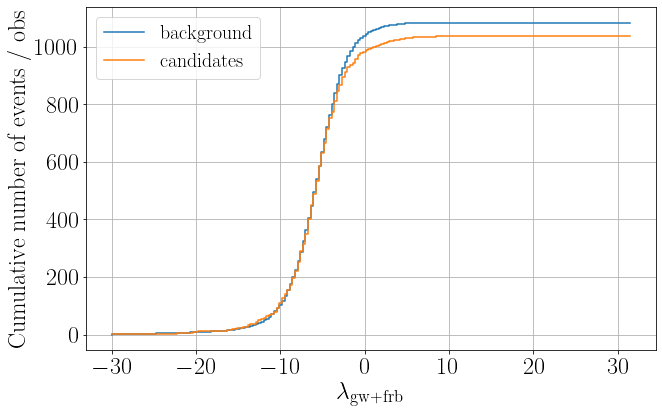

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.step(bins[:-1],cum_bg/100,label='background')
ax.step(bins[:-1],cum_fg,label='candidates')
ax.legend()
ax.set_xlabel('$\lambda_\mathrm{gw+frb}$')
ax.set_ylabel('Cumulative number of events / obs')

In [66]:
counts

array([  22,   21,   18,   18,   15,   18,   19,   23,   18,   19,   21,
         22,   17,   21,   16,   23,   21,   23,   26,   17,   21,   16,
         18,   27,   38,   27,   32,   40,   25,   29,   34,   38,   35,
         30,   44,   63,   41,   47,   45,   45,   55,   59,   64,   60,
         70,   90,   83,  117,  137,  144,  151,  158,  202,  224,  252,
        310,  312,  365,  426,  539,  631,  690,  846,  981, 1075, 1232,
       1448, 1695, 1821, 2151, 2422, 2693, 2958, 3304, 3617, 3846, 4055,
       4395, 4621, 4625, 4702, 4622, 4615, 4307, 4139, 3872, 3505, 3248,
       3000, 2530, 2274, 1939, 1736, 1449, 1202, 1032,  909,  777,  646,
        562,  422,  400,  347,  312,  239,  250,  201,  189,  143,  133,
        125,   97,   70,   71,   51,   50,   35,   36,   34,   21,   12,
         10,   10,    5,    8,    1,    7,    5,    1,    5,    1,    0,
          0,    0,    0,    1,    3,    0,    1,    0,    0,    0,    1,
          0,    0,    0,    0,    1,    0,    0,   

In [67]:
len(counts)

199

In [68]:
np.sum(counts)

108383

In [69]:
bins

array([-30.        , -29.68977442, -29.37954884, -29.06932326,
       -28.75909768, -28.44887209, -28.13864651, -27.82842093,
       -27.51819535, -27.20796977, -26.89774419, -26.58751861,
       -26.27729303, -25.96706745, -25.65684187, -25.34661628,
       -25.0363907 , -24.72616512, -24.41593954, -24.10571396,
       -23.79548838, -23.4852628 , -23.17503722, -22.86481164,
       -22.55458606, -22.24436047, -21.93413489, -21.62390931,
       -21.31368373, -21.00345815, -20.69323257, -20.38300699,
       -20.07278141, -19.76255583, -19.45233024, -19.14210466,
       -18.83187908, -18.5216535 , -18.21142792, -17.90120234,
       -17.59097676, -17.28075118, -16.9705256 , -16.66030002,
       -16.35007443, -16.03984885, -15.72962327, -15.41939769,
       -15.10917211, -14.79894653, -14.48872095, -14.17849537,
       -13.86826979, -13.55804421, -13.24781862, -12.93759304,
       -12.62736746, -12.31714188, -12.0069163 , -11.69669072,
       -11.38646514, -11.07623956, -10.76601398, -10.45

In [70]:
len(bins)

200

In [71]:
fg

Unnamed: 0  Unnamed: 0.1           name      ranking      fix_lnb  \
1              1             1  190701_223118     3.970222    11.301643   
3              3             3  190605_021909     3.644766    12.771765   
5              5             5  190411_050213     3.269549    10.246110   
18            18            18  190520_102326     2.118071     5.990904   
2              2             2  190409_032650     3.736220    11.120391   
...          ...           ...            ...          ...          ...   
1045        1045          1045  190519_230244  -157.725236   604.206402   
1046        1046          1046  190612_195828  -217.291139   406.788341   
1047        1047          1047  190519_230231  -219.163118   840.912410   
1048        1048          1048  190518_223900  -221.878322   367.513293   
1049        1049          1049  190621_081615 -4301.386103  8315.252956   

         relax_lnb      stat    gwfrbstat  
1         7.331421  4.952719     8.922941  
3         9.127000  3.862183     7.506948  
5         6.976561  3.681050     6.950599  
18        3.872832  4.148149     6.266221  
2         7.384171  2.218422     5.954642  
...            ...       ...          ...  
1045    761.931638  2.434241  -155.290995  
1046    624.079481 -1.029691  -218.320830  
1047   1060.075528 -3.614769  -222.777887  
1048    589.391614 -2.869363  -224.747685  
1049  12616.639059 -1.468428 -4302.854531  

[1050 rows x 8 columns]

In [72]:
gwfrbstat = fg['ranking'] + fg['stat']

In [73]:
fg['gwfrbstat'] = gwfrbstat

In [74]:
fg

Unnamed: 0  Unnamed: 0.1           name      ranking      fix_lnb  \
1              1             1  190701_223118     3.970222    11.301643   
3              3             3  190605_021909     3.644766    12.771765   
5              5             5  190411_050213     3.269549    10.246110   
18            18            18  190520_102326     2.118071     5.990904   
2              2             2  190409_032650     3.736220    11.120391   
...          ...           ...            ...          ...          ...   
1045        1045          1045  190519_230244  -157.725236   604.206402   
1046        1046          1046  190612_195828  -217.291139   406.788341   
1047        1047          1047  190519_230231  -219.163118   840.912410   
1048        1048          1048  190518_223900  -221.878322   367.513293   
1049        1049          1049  190621_081615 -4301.386103  8315.252956   

         relax_lnb      stat    gwfrbstat  
1         7.331421  4.952719     8.922941  
3         9.127000  3.862183     7.506948  
5         6.976561  3.681050     6.950599  
18        3.872832  4.148149     6.266221  
2         7.384171  2.218422     5.954642  
...            ...       ...          ...  
1045    761.931638  2.434241  -155.290995  
1046    624.079481 -1.029691  -218.320830  
1047   1060.075528 -3.614769  -222.777887  
1048    589.391614 -2.869363  -224.747685  
1049  12616.639059 -1.468428 -4302.854531  

[1050 rows x 8 columns]

In [75]:
fg.sort_values(by=['gwfrbstat'],ascending=False,inplace=True)

In [76]:
fg

Unnamed: 0  Unnamed: 0.1           name      ranking      fix_lnb  \
1              1             1  190701_223118     3.970222    11.301643   
3              3             3  190605_021909     3.644766    12.771765   
5              5             5  190411_050213     3.269549    10.246110   
18            18            18  190520_102326     2.118071     5.990904   
2              2             2  190409_032650     3.736220    11.120391   
...          ...           ...            ...          ...          ...   
1045        1045          1045  190519_230244  -157.725236   604.206402   
1046        1046          1046  190612_195828  -217.291139   406.788341   
1047        1047          1047  190519_230231  -219.163118   840.912410   
1048        1048          1048  190518_223900  -221.878322   367.513293   
1049        1049          1049  190621_081615 -4301.386103  8315.252956   

         relax_lnb      stat    gwfrbstat  
1         7.331421  4.952719     8.922941  
3         9.127000  3.862183     7.506948  
5         6.976561  3.681050     6.950599  
18        3.872832  4.148149     6.266221  
2         7.384171  2.218422     5.954642  
...            ...       ...          ...  
1045    761.931638  2.434241  -155.290995  
1046    624.079481 -1.029691  -218.320830  
1047   1060.075528 -3.614769  -222.777887  
1048    589.391614 -2.869363  -224.747685  
1049  12616.639059 -1.468428 -4302.854531  

[1050 rows x 8 columns]

In [77]:
fg['gwfrbstat'].values

array([    8.92294094,     7.50694821,     6.9505993 , ...,
        -222.77788715,  -224.74768507, -4302.85453121])

In [78]:
bg

Unnamed: 0  Unnamed: 0.1         name       ranking       fix_lnb  \
0                0             0  chunk70_663     32.979141     78.438030   
1                1             1  chunk97_213     28.174368     84.923274   
2                2             2  chunk62_582     16.720414     92.286157   
3                3             3  chunk17_497     13.829248     92.057008   
4                4             4  chunk74_411     13.195566    248.564570   
...            ...           ...          ...           ...           ...   
111362      111362        111362  chunk31_675 -20213.689802  23985.477046   
111363      111363        111363  chunk26_163 -23366.429459  24613.027914   
111364      111364        111364   chunk3_302 -24573.001154  26786.629929   
111365      111365        111365  chunk17_288 -27773.827506  23585.803754   
111366      111366        111366  chunk16_513 -33168.175935   3424.729524   

           relax_lnb      stat            gwname     gwfrbstat  
0          45.458890 -3.983977  b'190602_060204'     28.995164  
1          56.748906  2.560523  b'190417_170347'     30.734891  
2          75.565742 -1.007927  b'190522_035322'     15.712488  
3          78.227759 -5.621618  b'190502_133532'      8.207631  
4         235.369004 -5.404331  b'190517_002250'      7.791235  
...              ...       ...               ...           ...  
111362  44199.166848  0.619979  b'190518_045028' -20213.069823  
111363  47979.457373 -2.059066  b'190413_120354' -23368.488525  
111364  51359.631083 -4.375410  b'190419_211737' -24577.376564  
111365  51359.631260 -4.375410  b'190419_211737' -27778.202916  
111366  36592.905459 -1.338106  b'190505_221849' -33169.514041  

[111367 rows x 9 columns]

# FAR

In [81]:
for i in range(3):
    print('stat:', fg['gwfrbstat'].values[i])
    #print(bg[bg['gwfrbstat']>=fg['gwfrbstat'].values[i]])
    higherbg = bg[bg['gwfrbstat']>=fg['gwfrbstat'].values[i]]
    print( len (higherbg) / 100)

stat: 8.922940943390131
0.29
stat: 7.506948210299015
0.63
stat: 6.950599300907924
0.93


In [9]:
from ligo.skymap.tool.ligo_skymap_plot import main

In [14]:
main(['gw190711.fits -o gw190711_sky.png --annotate --contour 50 90 --radec 138.57 61.71 --colormap Blues'])

usage: ligo-skymap-plot [-h] [-o FILE.{pdf,png}] [--colormap CMAP]
                        [--help-colormap] [--figure-width INCHES]
                        [--figure-height INCHES] [--dpi PIXELS]
                        [--transparent [TRANSPARENT]] [--version]
                        [-l CRITICAL|ERROR|WARNING|INFO|DEBUG|NOTSET]
                        [--annotate] [--contour PERCENT [PERCENT ...]]
                        [--colorbar] [--radec deg deg]
                        [--inj-database FILE.sqlite] [--geo]
                        [--projection {mollweide,aitoff,globe,zoom}]
                        [--projection-center CENTER] [--zoom-radius RADIUS]
                        [INPUT.fits[.gz]]
ligo-skymap-plot: error: argument INPUT.fits[.gz]: can't open 'gw190711.fits -o gw190711_sky.png --annotate --contour 50 90 --radec 138.57 61.71 --colormap Blues': [Errno 2] No such file or directory: 'gw190711.fits -o gw190711_sky.png --annotate --contour 50 90 --radec 138.57 61.71 --colorma

Traceback (most recent call last):
  File "/usr/lib/python3.7/argparse.py", line 1211, in __call__
    self._errors)
FileNotFoundError: [Errno 2] No such file or directory: 'gw190711.fits -o gw190711_sky.png --annotate --contour 50 90 --radec 138.57 61.71 --colormap Blues'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.7/argparse.py", line 2411, in _get_value
    result = type_func(arg_string)
  File "/work/yifan.wang/virtualenv/sgwb/lib/python3.7/site-packages/ligo/skymap/tool/__init__.py", line 50, in __call__
    return super().__call__(string)
  File "/usr/lib/python3.7/argparse.py", line 1214, in __call__
    raise ArgumentTypeError(message % (string, e))
argparse.ArgumentTypeError: can't open 'gw190711.fits -o gw190711_sky.png --annotate --contour 50 90 --radec 138.57 61.71 --colormap Blues': [Errno 2] No such file or directory: 'gw190711.fits -o gw190711_sky.png --annotate --contour 50 90 --radec 

TypeError: object of type 'NoneType' has no len()

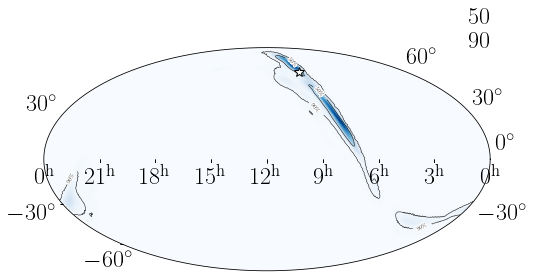

In [22]:
filename = 'gw190711.fits'
main([filename, '-o gw190711_sky.png','--annotate', '--radec','138.57','61.71','--contour', '50', '90','--colormap','Blues'])